# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | mogadishu
Processing Record 5 of Set 1 | mehamn
Processing Record 6 of Set 1 | tocopilla
Processing Record 7 of Set 1 | am timan
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | nurota
Processing Record 13 of Set 1 | paamiut
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | terra santa
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | san juan
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | presidencia roque saenz pena
Processing Record 22 of Set 1 | barentsbu

Processing Record 37 of Set 4 | mariveles
Processing Record 38 of Set 4 | kavaratti
Processing Record 39 of Set 4 | poum
Processing Record 40 of Set 4 | saskylakh
Processing Record 41 of Set 4 | syracuse
Processing Record 42 of Set 4 | bubaque
Processing Record 43 of Set 4 | hami
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 46 of Set 4 | panzhihua
Processing Record 47 of Set 4 | garden city
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | oranjemund
Processing Record 0 of Set 5 | san jose
Processing Record 1 of Set 5 | grindavik
Processing Record 2 of Set 5 | mareeba
Processing Record 3 of Set 5 | konstantinovka
Processing Record 4 of Set 5 | coronel martinez
Processing Record 5 of Set 5 | sambava
Processing Record 6 of Set 5 | shimoda
Processing Record 7 of Set 5 | isangel
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | klaksvik
Processing Record 10 o

Processing Record 25 of Set 8 | chandauli
Processing Record 26 of Set 8 | antofagasta
Processing Record 27 of Set 8 | maceio
Processing Record 28 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 29 of Set 8 | talcahuano
Processing Record 30 of Set 8 | hasaki
Processing Record 31 of Set 8 | norman wells
Processing Record 32 of Set 8 | lolua
City not found. Skipping...
Processing Record 33 of Set 8 | mazagao
Processing Record 34 of Set 8 | la palma
Processing Record 35 of Set 8 | tallahassee
Processing Record 36 of Set 8 | atar
Processing Record 37 of Set 8 | sharjah
Processing Record 38 of Set 8 | hokitika
Processing Record 39 of Set 8 | tuatapere
Processing Record 40 of Set 8 | imbituba
Processing Record 41 of Set 8 | snezhnogorsk
Processing Record 42 of Set 8 | yumen
Processing Record 43 of Set 8 | bengkulu
Processing Record 44 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 8 | fuengirola
Processing Record 46 of Set 8 | sobolevo
Processing 

Processing Record 11 of Set 12 | bar harbor
Processing Record 12 of Set 12 | schwerin
Processing Record 13 of Set 12 | cap malheureux
Processing Record 14 of Set 12 | sakakah
Processing Record 15 of Set 12 | charleston
Processing Record 16 of Set 12 | sug-aksy
City not found. Skipping...
Processing Record 17 of Set 12 | ulladulla
Processing Record 18 of Set 12 | alto araguaia
Processing Record 19 of Set 12 | karaul
City not found. Skipping...
Processing Record 20 of Set 12 | ossora
Processing Record 21 of Set 12 | bud
Processing Record 22 of Set 12 | sa kaeo
Processing Record 23 of Set 12 | dargaville
Processing Record 24 of Set 12 | achisay
City not found. Skipping...
Processing Record 25 of Set 12 | ormara
Processing Record 26 of Set 12 | krasnoselkup
Processing Record 27 of Set 12 | giyani
Processing Record 28 of Set 12 | kuliyapitiya
Processing Record 29 of Set 12 | obertyn
Processing Record 30 of Set 12 | puerto rico
Processing Record 31 of Set 12 | albufeira
Processing Record 32 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,-17.92,72,55,0.89,GL,1681340458
1,ushuaia,-54.8000,-68.3000,3.81,65,75,7.72,AR,1681340459
2,provideniya,64.3833,-173.3000,-14.80,61,20,3.13,RU,1681340459
3,mogadishu,2.0371,45.3438,27.54,76,100,5.05,SO,1681340411
4,mehamn,71.0357,27.8492,-2.05,66,20,7.10,NO,1681340460


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaanaaq,77.4840,-69.3632,-17.92,72,55,0.89,GL,1681340458
1,ushuaia,-54.8000,-68.3000,3.81,65,75,7.72,AR,1681340459
2,provideniya,64.3833,-173.3000,-14.80,61,20,3.13,RU,1681340459
3,mogadishu,2.0371,45.3438,27.54,76,100,5.05,SO,1681340411
4,mehamn,71.0357,27.8492,-2.05,66,20,7.10,NO,1681340460


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

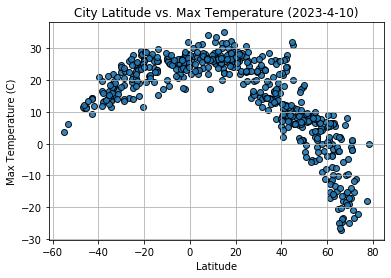

In [8]:
# Build scatter plot for latitude vs. temperature
x1 = city_data_df["Lat"]
y1 = city_data_df["Max Temp"]

lat_temp = plt.scatter(x1, y1, alpha="0.9", edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-4-10)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

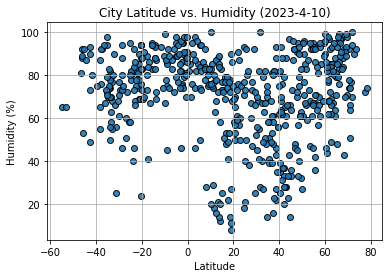

In [9]:
# Build the scatter plots for latitude vs. humidity
x2 = city_data_df["Lat"]
y2 = city_data_df["Humidity"]

lat_hum = plt.scatter(x2, y2, alpha="0.9", edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-4-10)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

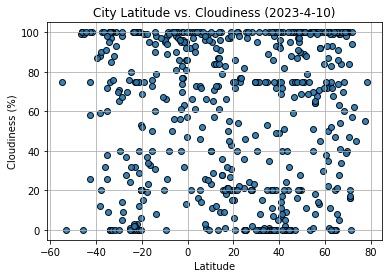

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x3 = city_data_df["Lat"]
y3 = city_data_df["Cloudiness"]

lat_cloud = plt.scatter(x3, y3, alpha="0.9", edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-4-10)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

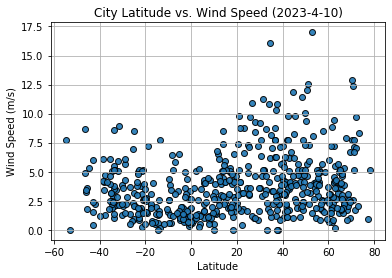

In [11]:
# Build the scatter plots for latitude vs. wind speed
x4 = city_data_df["Lat"]
y4 = city_data_df["Wind Speed"]

lat_wind = plt.scatter(x4, y4, alpha="0.9", edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-4-10)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaanaaq,77.4840,-69.3632,-17.92,72,55,0.89,GL,1681340458
2,provideniya,64.3833,-173.3000,-14.80,61,20,3.13,RU,1681340459
3,mogadishu,2.0371,45.3438,27.54,76,100,5.05,SO,1681340411
4,mehamn,71.0357,27.8492,-2.05,66,20,7.10,NO,1681340460
6,am timan,11.0297,20.2827,31.97,29,29,1.39,TD,1681340461


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,3.81,65,75,7.72,AR,1681340459
5,tocopilla,-22.0920,-70.1979,19.27,81,3,3.73,CL,1681339914
7,lebu,-37.6167,-73.6500,13.52,92,100,4.75,CL,1681340461
9,kruisfontein,-34.0033,24.7314,14.68,50,100,2.92,ZA,1681340463
10,vaini,-21.2000,-175.2000,29.09,74,75,5.14,TO,1681340466


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8696022388806817


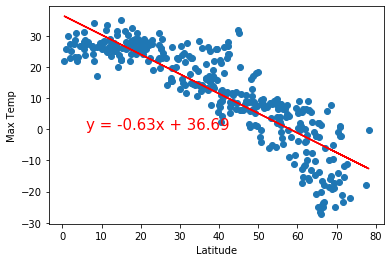

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7437765267838535


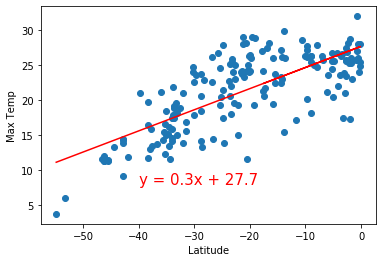

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,8),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
For cities in the northern hemisphere, as latitude increases, the temperature decreases. There is a negative correlation between latitude and temperature for cities in the northern hemisphere. The r value is close to -1, indicating a strong negative correlation. This is not the case for cities in the southern hemisphere -- as latitude increases, the temperature also increases. There is a positive correlation between latitude and temperature for cities in the southern hemisphere. The r value is close to 1, indicating a strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19601524707718823


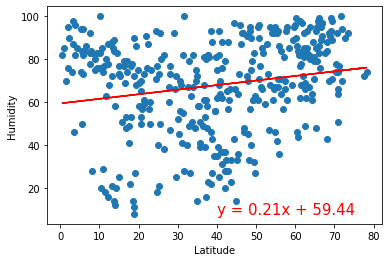

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,8),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.26383818404231324


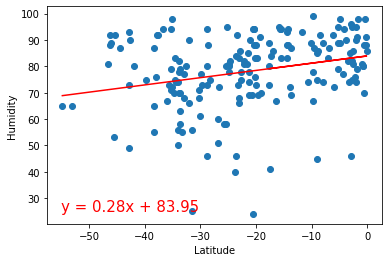

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
There is a positive correlation between latitude and humidity for both hemispheres. However, the r values for both are close to 0, indicating a weak correlation. In both hemispheres, as the latitude increases so does humidity, but only slightly. The correlation is very slightly stronger for the northern hemisphere than the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09653471040019614


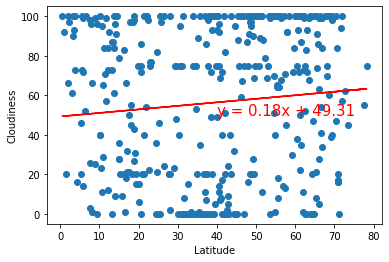

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.11364128704382379


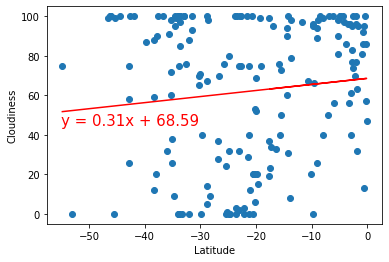

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
For both hemispheres, as latitude increases so does cloudiness. The r values for both hemispheres when comparing latitude and cloudiness are very similar. They both indicate a weak positive correlation, as they are both slightly above 0. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11887832500639332


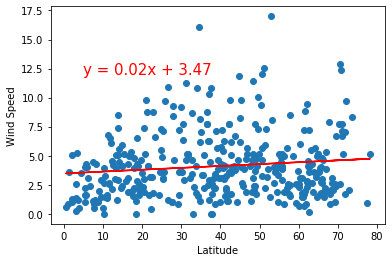

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,12),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.3276941127518037


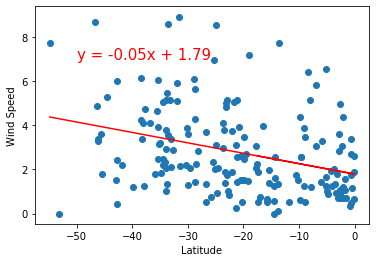

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,7),fontsize=15,color="red")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** 
For cities in the northern hemisphere, the r value is slightly above 0 indicating a weak positive correlation between latitude and wind speed -- as latitude increases, wind speed also increases. For cities in the southern hemisphere, the r value is below 0 indicating a negative correlation between latitude and wind speed -- as latitude increases, wind speed decreases.